In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn


In [7]:
df = pd.read_csv("datasets/kaggle-2021-04-27.csv")

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


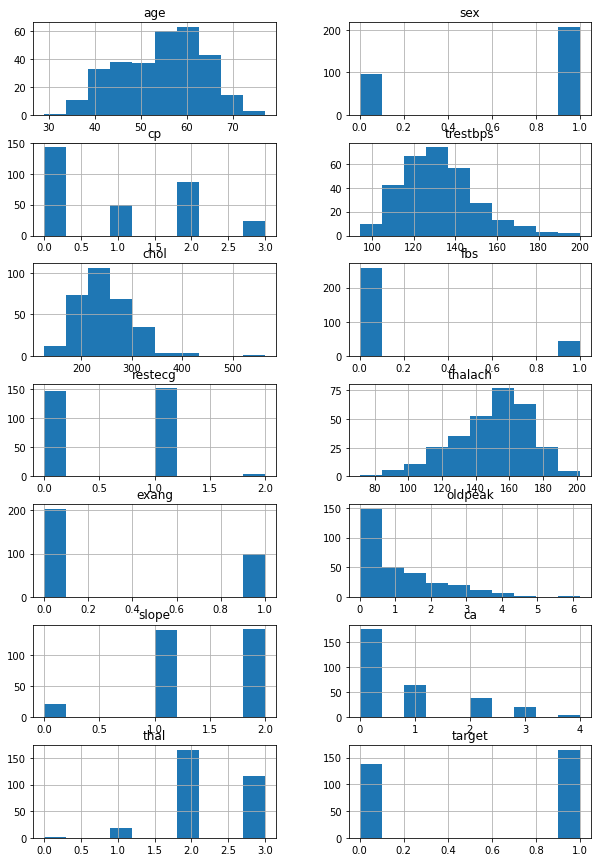

In [12]:
fig, axis = plt.subplots(7, 2, figsize=(10, 15))
df.hist(ax=axis)
plt.show()

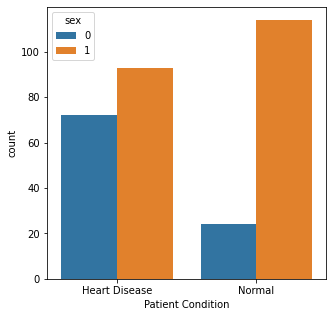

In [13]:

plt.figure(figsize=(5, 5))

ax = sns.countplot(x=df['target'].apply(lambda x:'Heart Disease' if x == 1 else 'Normal'), hue=df['sex'])
ax.set_xlabel('Patient Condition')

plt.show()

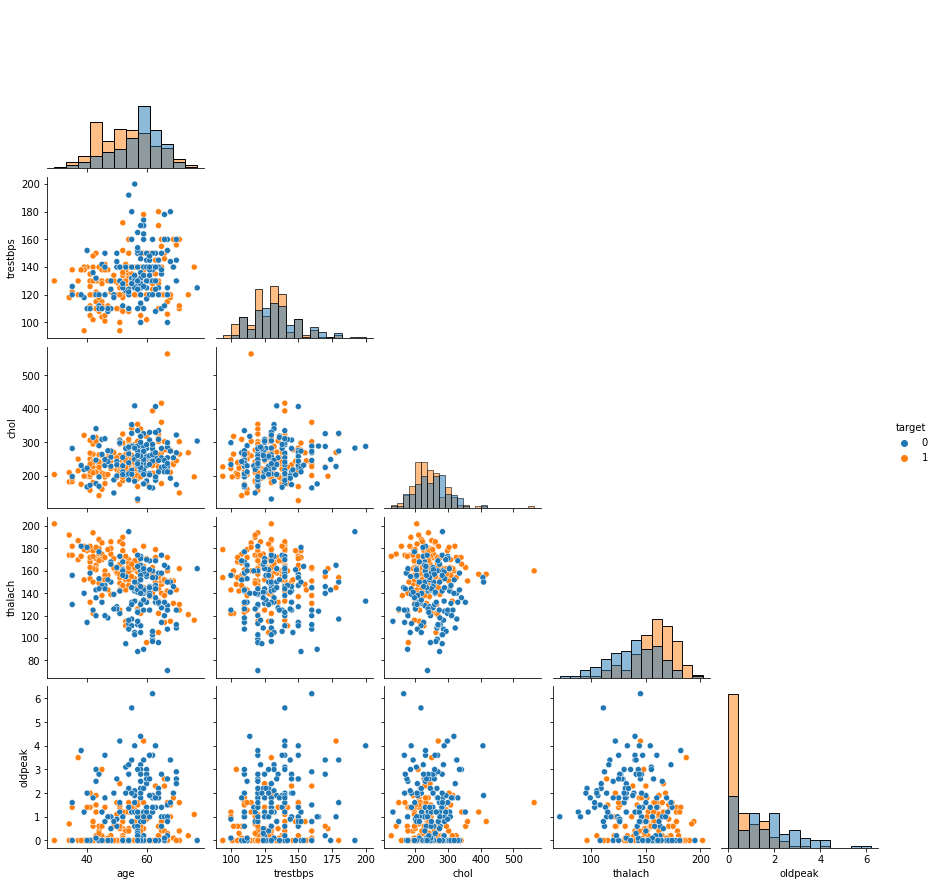

In [14]:

columns = ['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(df[columns], hue='target', corner=True, diag_kind='hist')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df = pd.read_csv("datasets/kaggle-2021-04-27.csv")
y = df['target']
x = df.drop(columns=['target'])

In [24]:
# avoid data leakage on hyperparameters tuning with cross validation
# use it to tune c from [1, 10)

for c in range(1, 10):
    clf = svm.SVC(kernel='linear', C=c, random_state=42)
    scores = cross_val_score(clf, x, y, cv=10, scoring='f1_macro')
    print(f'{c} {scores.mean():.2f}, {scores.std():.2f}')

# this takes a butload of time. the results were the following:
# 1 0.8295201856417531, 0.07088126126144809
# 2 0.8295201856417531, 0.07088126126144809
# 3 0.8295201856417531, 0.07088126126144809
# 4 0.826207089937353, 0.06851337858010581
# 5 0.8259398879438085, 0.07487633421329258
# 6 0.8329999234964909, 0.06840540939566306 << best
# 7 0.8329999234964909, 0.06840540939566306 << best
# 8 0.8329999234964909, 0.06840540939566306 << best
# 9 0.8298246834365255, 0.06444611964043091

1 0.8295201856417531, 0.07088126126144809
2 0.8295201856417531, 0.07088126126144809
3 0.8295201856417531, 0.07088126126144809
4 0.826207089937353, 0.06851337858010581
5 0.8259398879438085, 0.07487633421329258
6 0.8329999234964909, 0.06840540939566306
7 0.8329999234964909, 0.06840540939566306
8 0.8329999234964909, 0.06840540939566306
9 0.8298246834365255, 0.06444611964043091


In [9]:
from sklearn import svm

svm = svm.SVC(kernel='linear', C=6, random_state=42)
nb = GaussianNB()
vote = VotingClassifier(n_jobs=-1, estimators=[('SVM', svm), ('nb', nb)], voting='hard')

for name, classifier in [('SVM', svm), ('Naive Bayes', nb), ('Vote', vote)]:
    for method in ['f1_macro', 'accuracy', 'precision', 'recall']:
        scores = cross_val_score(classifier, x, y, cv=10, scoring=method)
        print(f'{name} {method}, {scores.mean()}, {scores.std()}') 

SVM f1_macro, 0.8329999234964909, 0.06840540939566306
SVM accuracy, 0.8381720430107527, 0.06581883712245774
SVM precision, 0.8255450178476493, 0.07412504383880404
SVM recall, 0.9014705882352942, 0.09775264489912835
SVM f1_macro, 0.8017863813122761, 0.06761536820970812
SVM accuracy, 0.8050537634408602, 0.06614616440373149
SVM precision, 0.8209081527347781, 0.07795281979199263
SVM recall, 0.8294117647058823, 0.08350040921516699
SVM f1_macro, 0.8127139221809936, 0.06583136009430311


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

y_pred = cross_val_score(svm, x, y, cv=10)
confusion_matrix(y, y_pred)



In [ ]:
y_pred = cross_val_score(nb, x, y, cv=10)
confusion_matrix(y, y_pred)



In [ ]:
y_pred = cross_val_score(vote, x, y, cv=10)
confusion_matrix(y, y_pred)

